## Visualizing Burn Areas in Los Angeles From the Eaton and Palisades Fires

### Author: Stephan Kadonoff
### Github: https://github.com/SRKads1998/eds220-hwk4.git

## About

### Purpose
This notebook, hwk4-task2-false-color-Kadonoff, is an analysis of Fire burn areas within the greater Los Angeles areas created by the Eaton and Palisades fires in early 2025. Within this notebook we created a false color imaging map with polygons for both of the burn areas.

### Highlights
- Preliminary data importation and exploration
- Data wrangling and cleaning
- True and false imaging
- Final map creation

### About the data:
This notebook utilized 3 different Datasets:

1. Landsat Collection 2 Level-2
This first dataset is a simplified remote sensing based landsat band collection set containing Red, Green, Blue, Near-Infrared, and Infrared, and Shortwave Infrared Red bands. This dataset comes to us from the [Microsoft Planetary Computer data catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) and is clipped to the greater Los Angeles area. This dataset is utilized for visualizing the different raster bands for the true and false color images. 

2. Palisades Fire and Eaton
These geojsons are sourced from the ArcGIS Hub website, which is a common repository for users to share geospatial data. They are simple geo datasets which contain mostly the spatial geometry for their respective polygons and are utlized to show the the burn perimeters, as well as accompany the raster data with vector data. 

## Section 1: Preliminary data importing and exploration
In this first part of the notebook, we are going to import the necessary libraries, as well as read in the data needed for the analysis. We will utilize os.path.join, which is a function in the os package, to read in the landsat data, and then read in the fire polygon geojson files with the geopandas library.

In [5]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr 
import matplotlib.patches as mpatches
import rioxarray as rioxr

In [6]:
# import the landsat dataset
fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')

landsat = xr.open_dataset(fp)

In [7]:
#view the landsat data and evaluate the information within
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [8]:
#read in the perimeter data, create filepath variables for to read the geojson files in easier. 
eaton_fp = 'data/Eaton_Perimeter_20250121.geojson'
palisades_fp = 'data/Palisades_Perimeter_20250121.geojson'

eaton = gpd.read_file(eaton_fp)
palisades = gpd.read_file(palisades_fp)
palisades

,OBJECTID,type,Shape__Area,Shape__Length,geometry
0,1,Heat Perimeter,1.182082e+03,267.101144,"POLYGON ((-118.51962 34.03061, -118.51962 34.0..."
1,2,Heat Perimeter,2.222488e+03,185.498783,"POLYGON ((-118.51944 34.03176, -118.51944 34.0..."
2,3,Heat Perimeter,2.101172e+01,22.412814,"POLYGON ((-118.52011 34.03244, -118.52011 34.0..."
3,4,Heat Perimeter,2.149922e+02,76.639180,"POLYGON ((-118.52061 34.03235, -118.52063 34.0..."
4,5,Heat Perimeter,4.420345e+04,1569.259764,"POLYGON ((-118.52560 34.03302, -118.52560 34.0..."
5,6,Heat Perimeter,3.734375e+01,25.061294,"POLYGON ((-118.52286 34.03427, -118.52283 34.0..."
6,7,Heat Perimeter,1.183555e+02,46.890360,"POLYGON ((-118.52276 34.03435, -118.52273 34.0..."
7,8,Heat Perimeter,1.686719e+01,16.860287,"POLYGON ((-118.51818 34.03739, -118.51820 34.0..."
8,9,Heat Perimeter,1.766301e+03,264.850402,"POLYGON ((-118.53964 34.03715, -118.53971 34.0..."
9,10,Heat Perimeter,7.939795e+04,2620.515743,"POLYGON ((-118.51748 34.03607, -118.51752 34.0..."


In [9]:
# use .head function to make sure data properly read in
palisades.head(3)
eaton.head(3)

,OBJECTID,type,Shape__Area,Shape__Length,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-118.10094 34.16681, -118.10090 34.1..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-118.13596 34.17789, -118.13593 34.1..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-118.15626 34.18045, -118.15643 34.1..."


In [11]:
# check the CRS of the two geojsons, will need to update to match the landsat data.
print(eaton.crs)
print(palisades.crs)

#check if these two geojson CRSs are projected or geographic coordinate systems
print(palisades.crs.is_geographic)
print(eaton.crs.is_geographic)

EPSG:4326
EPSG:4326
True
True


### 2. Fire Data Exploration

Summary:
The datasets are currently in the CRS: EPSG4326 which is a projected coordinate system. The datasets are fairly basic, and mostly just geometric data.  

## Section 2. Data Wrangling and cleaning. 
In this section, now that we have a basic understanding of how the datasets are currently formatted, and what is included in them, we can begin wrangling the data and formatting it in a way so that we can integrate them into a map for visualization.

## 3. NetCDF data import and exploration

Summary:
The variables are the different landsat bands, such as SWIR, Red, Blue etc..., most of the datatypes are in float32 or float64, and the dimensions of the dataset are (x:2742 and y:1418), coordinates are as follows: 

In [12]:
print(landsat.coords)

Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...


## 4. Restoring geospatial information

4a. #a. use rio.crs to print what is the CRS of this dataset. Is it a geo-spatial object?
Kind of. While it does have geo-spatial data, we will need to reset the CRS since the data is currently formatted in a manner that would make the analysis difficult. The CRS is stored within a variable, and has not had a CRS assigned to the whole dataset yet, but in the dataset itself, it says EPSG:32611 under the coordinates. 

In [13]:
# utilize rio.crs and spatial_ref.crs_wkt within print statements to obtain the information from the landsat dataset.
#a.
print('CRS: ', landsat.rio.crs)
#b 
print('CRS: ', landsat.spatial_ref.crs_wkt)

#reset the CRS from the spatial_ref variable as the CRS for the whole dataset
#c
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)



CRS:  None
CRS:  PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [14]:
#print the crs to confirm the above worked correctly. 
#d 
print('CRS: ', landsat.rio.crs)

CRS:  EPSG:32611


In [15]:
landsat.rio.crs

CRS.from_epsg(32611)

##### answers to the HW questions
a. Use rio.crs to print what is the CRS of this dataset. Is it a geo-spatial object?
It appears that the dataset does not have a CRS from the rio.crs function, but in the dataset itself, it says EPSG:32611 under the coordinates
b. CRS is Projcs:WGS 84
c. CRS.from_epsg(32611)
d. CRS:  EPSG:32611

## Section 3: True and False Imaging

In this section, we will create two images of the greater Los Angeles Area, utliizing True and False coloring systems. This will provide a "real" image of what we expect a satellite captured image to look lik

## 5. True Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


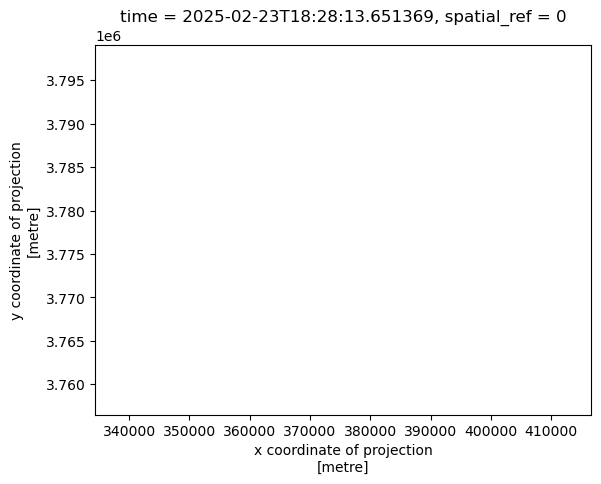

In [16]:
#create a true color image by plotting the red green and blue bands from "landsat"
#a
landsat[["red", "green", "blue"]].to_array().plot.imshow()

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


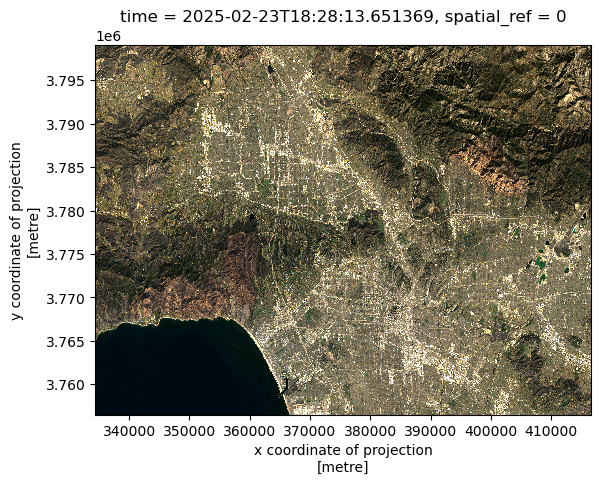

In [17]:
# set robust as equal to true to remove outliers and create the proper true color visualization map
#b 
landsat[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

In [18]:
#check which band has na values with a simple for loop and print function
#c
for band in ['red', 'green', 'blue']:
    contains_nan = np.isnan(landsat[band].values).any()
    print(band, "contains NaN: ", contains_nan)

red contains NaN:  False
green contains NaN:  True
blue contains NaN:  True


In [19]:
# set Na values as 0 with a the fillna() function
#d 
landsat = landsat.fillna(0)

#### True Color Map
Now that we have updated our script to remove outliers with the robust = true setting, and replaced all NA values with zero, we can obtain the proper true color map

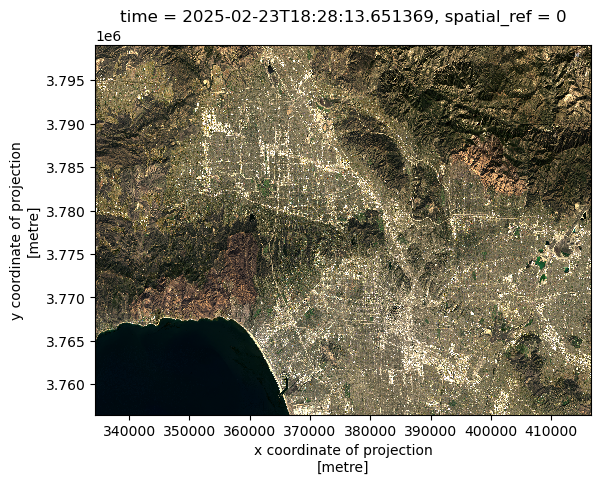

In [20]:
#e
landsat[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

#### f
The main difference between the two plots is that the first plot was completely missing all the satellite raster data, due to the fact we had not filtered out the outliers which kept the map blank, while the second plot has all the properly projected color bands due to setting robust as equal to true and replacing all NA values with 0. 

## 6. False color image
Since we were able to clear the inital warning messages by setting NA values to 0 and robust as equaling true, we can run the same script to visualize the false color map, just by switching out which bands we want to use.

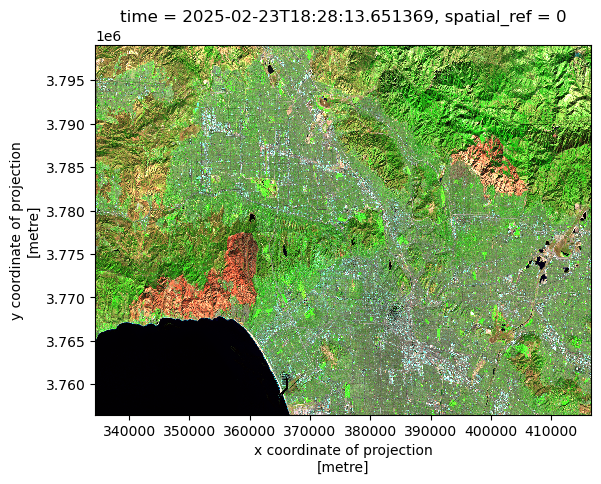

In [21]:
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

## Section 4: Final Map Creation
Here, we put all our hard work together. At this stage we will join the fire polygons with the false color image map, and add relevant annotations and other details using matplotlib functions under the plt function umbrella. 

## 7. Map
a. Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

b. Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [22]:
#a 
# match CRSs between the fire perimeters and the raster map
palisades = palisades.to_crs("epsg:32611")
eaton = eaton.to_crs("epsg:32611")

# check to make sure the crs are updated
assert palisades.crs == eaton.crs

assert palisades.crs == landsat.rio.crs

Text(359685.36156206025, 3766541.9175566765, 'Palisades Fire')

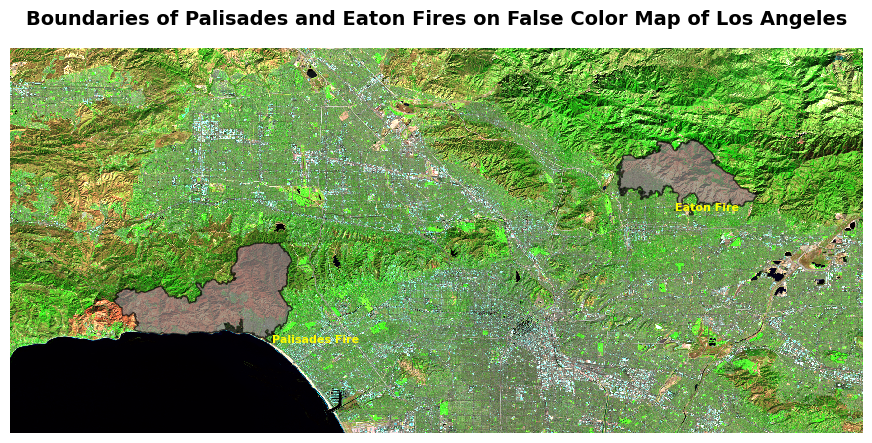

In [23]:
# make a map

fig, ax = plt.subplots(figsize = (11,5)) #create a figure and dimensions of the final map

# map the eaton polygon onto the landsat false coloring
eaton.plot(ax = ax, 
           edgecolor = "black", 
           linewidth = 1, 
           color =  'grey',
           alpha = 0.7)

#map the palisades polygon onto the lands false coloring
palisades.plot(ax = ax, 
           edgecolor = "black", 
           linewidth = 1, 
           color =  'grey',
           alpha = 0.7)

#use the false color map from above
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

# set a title for the map
ax.set_title("Boundaries of Palisades and Eaton Fires on False Color Map of Los Angeles",
            fontsize=14, fontweight = 'bold')

# remove axis 
ax.axis('off')

# add annotations
ax.annotate('Grey Polygons: Eaton and Palisades Fire Boundaries',
            xy = (100,100), fontsize = 4, color = 'black')

# add labels for each fire polygon
eaton_centroid = eaton.geometry.centroid.iloc[0]
palisades_centroid = palisades.geometry.centroid.iloc[0]

#add text names for the two fire polygons, indicating which is which
ax.text(eaton_centroid.x, eaton_centroid.y,
        "Eaton Fire",
        color="yellow", fontsize=8, weight="bold")

ax.text(palisades_centroid.x, palisades_centroid.y,
        "Palisades Fire",
        color="yellow", fontsize=8, weight="bold")

### 7. b  Write a figure description for the map including a brief explanation of how false color imagery is being used.

This map utilizes false color imaging methods for visualizing the Greater Los Angeles area, and visualizes the burn areas of the Eaton and Palisades fires. 

Specifically, the Shortwave infrared (or SWIR) band is used to visualize the burn areas, which are shown under the fire perimeter polygons. The Near-Infrared (NIR) band is visualizing the vegetation spaces and other non-urban areas, which are shown in bright green. Lastly the Red band is visualizing water bodies, urban areas and non-vegetated areas in general. 

## References

1. NIFC FIRIS (2025). Palisades and Eaton Dissolved Fire Perimeters (2025, Jan. 21). https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about [Accessed 11/20/2025]

2.  United States Geological Survey. Landsat Collection 2 Level-2: Microsoft Planetary Computer. (2024). https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 [Accessed 11/20/2025]